# 12-752: Data-Driven Building Energy Management
## Fall 2016, Carnegie Mellon University

## Assignment \#2

We will begin by unpickling the dataset we had played around with in Lecture 4. But first, we will load most modules we will be using:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import itertools
import pickle

%matplotlib inline

To unpickle just do this:

In [3]:
pickle_file = open('D:/CMU/Data Driven/F16-12-752/homeworks/homework2/campusDemand.pkl','rb')
pickled_data = pickle.load(pickle_file)
pickle_file.close()

# Since we pickled them all together as a list, I'm going to assign each element of the list to the same variable
# we had been using before:
data = pickled_data[0]
pointNames = pickled_data[1]
data_by_day = pickled_data[2]
idx = pickled_data[3]

## -=-=-= Exploring hourly and weekly consumption patterns (no seasonality) =-=-=-

# Task \#1 (10%)

Create a new Pandas Data Frame that contains only two columns (Time and Value) and only the rows that belong to the University-wide meter (Electric kW Calculations Main Campus). In other words, get rid of the Point Name column and select only the rows for the campus meter.

In [4]:
data['Point name'].value_counts()

s=data.loc[data['Point name']=='Electric kW Calculations - Main Campus kW']
s[['Time','Value']]
# data.tail()

,Time,Value
152348,2013-11-10 00:00:30,8367.816250
152349,2013-11-10 00:01:30,8287.111375
152350,2013-11-10 00:02:30,8340.608125
152351,2013-11-10 00:03:30,8342.061625
152352,2013-11-10 00:04:30,8341.360375
152353,2013-11-10 00:05:30,8343.680875
152354,2013-11-10 00:06:30,8335.307125
152355,2013-11-10 00:07:30,8294.368000
152356,2013-11-10 00:08:30,8327.415375
152357,2013-11-10 00:09:30,8287.635875


# Task \#2 (10%)

In one figure, plot one histogram showing the average hourly consumption on the entire dataset.
In a separate figure, plot 7 subplots with similar histograms but now showing the average hourly consumption for each day of the weeek (hence the 7 supplots).

C:\Users\Roja\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


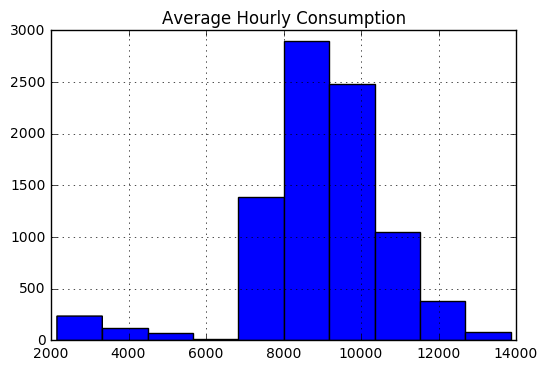

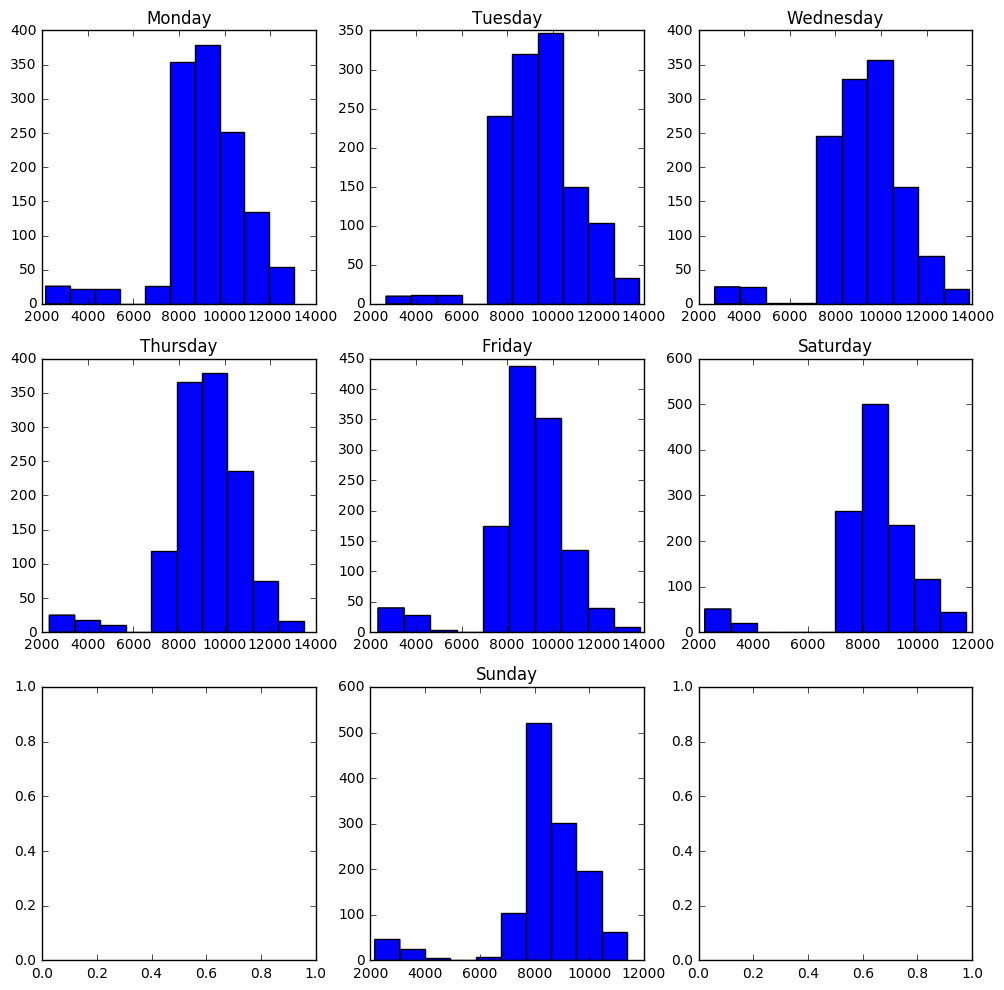

In [5]:
# plt.figure()
# pd.DataFrame({index})
# for i in range(0,6):
#     df=pd.DataFrame(s.ix.mean(),columns=['Time','Value']) 
#     df.plot.hist()

s['Weekday']=s['Time'].dt.dayofweek
t1=s

t1=s.set_index('Time') 
t2=t1.resample('H').mean()

t2.describe()
t2['Value'].hist()
plt.title('Average Hourly Consumption')

# Monday=t2[t2['Weekday']==0]
# Tuesday=t2[t2['Weekday']==1]
# Wednesday=t2[t2['Weekday']==2]
# Thursday=t2[t2['Weekday']==3]
# Friday=t2[t2['Weekday']==4]
# Saturday=t2[t2['Weekday']==5]
# Sunday=t2[t2['Weekday']==6]
# t2.groupby['Weekday']t2['Value'].hist

# t=s

# week_days = np.array([x.to_datetime().weekday() for x in t['Time']])

# Monday = t.ix[week_days == 0]
# Tuesday = t.ix[week_days == 1]
# Wednesday = t.ix[week_days == 2]
# Thursday = t.ix[week_days == 3]
# Friday = t.ix[week_days == 4]
# Saturday = t.ix[week_days == 5]
# Sunday = t.ix[week_days == 6]
       
Wd=t2.groupby(['Weekday'])

Monday=t2[t2['Weekday']==0]
Tuesday=t2[t2['Weekday']==1]
Wednesday=t2[t2['Weekday']==2]
Thursday=t2[t2['Weekday']==3]
Friday=t2[t2['Weekday']==4]
Saturday=t2[t2['Weekday']==5]
Sunday=t2[t2['Weekday']==6]

Monday1=Monday.drop(Monday.columns[1],axis=1)
Tuesday1=Tuesday.drop(Monday.columns[1],axis=1)
Wednesday1=Wednesday.drop(Monday.columns[1],axis=1)
Thursday1=Thursday.drop(Monday.columns[1],axis=1)
Friday1=Friday.drop(Monday.columns[1],axis=1)
Saturday1=Saturday.drop(Monday.columns[1],axis=1)
Sunday1=Sunday.drop(Monday.columns[1],axis=1)

plt.subplots(nrows=3,ncols=3,figsize=(12,12))

plt.subplot(331)
plt.hist(Monday1['Value'])
plt.title('Monday')

plt.subplot(332)
plt.hist(Tuesday1['Value'])
plt.title('Tuesday')

plt.subplot(333)
plt.hist(Wednesday1['Value'])
plt.title('Wednesday')

plt.subplot(334)
plt.hist(Thursday1['Value'])
plt.title('Thursday')

plt.subplot(335)
plt.hist(Friday1['Value'])
plt.title('Friday')

plt.subplot(336)
plt.hist(Saturday1['Value'])
plt.title('Saturday')

plt.subplot(338)
plt.hist(Sunday1['Value'])
plt.title('Sunday')

# fig=plt.figure(figsize=(20,3))

# for i in range(0,6):
#     plt.subplot(171+i)
#     plt.hist(data_by_day[i]['Value']) 
    


# del t2['Weekday']
#for i in range(0,6):
#         t_i=t2.Weekday.ix
#         t_i['Value'].hist()

# Task \#3 (10%)

In one figure, create a box plot of the average hourly electricity consumption for each hour of the day (i.e., your plot will show 24 *boxes*, one for each hour of the day, and each *box* will represent the distribution of the average hourly consumption in the dataset for that hour).

In another figure, create 7 subplots showing the same box plots as above, but now for each of the seven days of the week.

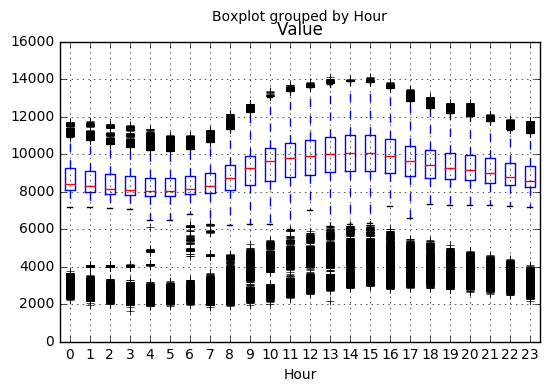

In [6]:
t3=t1
t3['Hour']=t3.index.hour
#t3[['Hour','Value']].groupby('Hour').mean()
# t4=t3.groupby(['Hour']).mean()
# t4.set_index('Hour')
# del t4['Day']
t3.boxplot(column='Value',by='Hour')
# t4.plot.box()
# t3=t3.groupby(['Weekday'])



C:\Users\Roja\Anaconda3\lib\site-packages\ipykernel\__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Roja\Anaconda3\lib\site-packages\ipykernel\__main__.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Roja\Anaconda3\lib\site-packages\ipykernel\__main__.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-

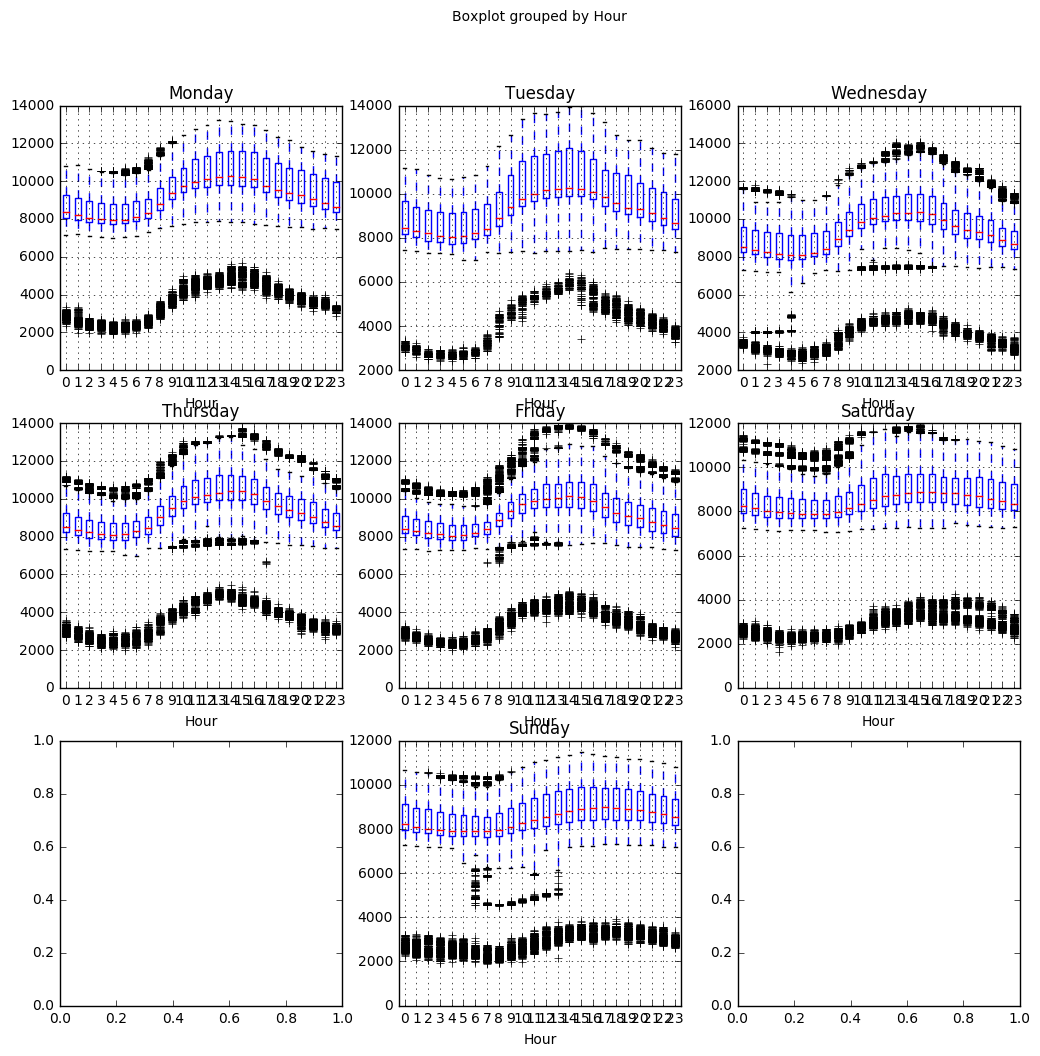

In [7]:
M=t3[t3['Weekday']==0]
T=t3[t3['Weekday']==1]
W=t3[t3['Weekday']==2]
Th=t3[t3['Weekday']==3]
F=t3[t3['Weekday']==4]
Sa=t3[t3['Weekday']==5]
S=t3[t3['Weekday']==6]

M1=M[['Value','Weekday']]
T1=T[['Value','Weekday']]
W1=W[['Value','Weekday']]
Th1=Th[['Value','Weekday']]
F1=F[['Value','Weekday']]
Sa1=Sa[['Value','Weekday']]
S1=S[['Value','Weekday']]

# ax = plt.gca()
# df.boxplot('val', 'day', ax=ax)
plt.subplots(nrows=3,ncols=3,figsize=(12,12))

plt.subplot(3,3,1)
M1['Hour']=M1.index.hour
ax=plt.gca()
M1.boxplot(column='Value',by='Hour',ax=ax)
plt.title('Monday')

plt.subplot(3,3,2)
T1['Hour']=T1.index.hour
ax=plt.gca()
T1.boxplot(column='Value',by='Hour',ax=ax)
plt.title('Tuesday')

plt.subplot(3,3,3)
W1['Hour']=W1.index.hour
ax=plt.gca()
W1.boxplot(column='Value',by='Hour',ax=ax)
plt.title('Wednesday')

plt.subplot(3,3,4)
Th1['Hour']=Th1.index.hour
ax=plt.gca()
Th1.boxplot(column='Value',by='Hour',ax=ax)
plt.title('Thursday')

plt.subplot(3,3,5)
F1['Hour']=F1.index.hour
ax=plt.gca()
F1.boxplot(column='Value',by='Hour',ax=ax)
plt.title('Friday')

plt.subplot(3,3,6)
Sa1['Hour']=Sa1.index.hour
ax=plt.gca()
Sa1.boxplot(column='Value',by='Hour',ax=ax)
plt.title('Saturday')

plt.subplot(3,3,8)
S1['Hour']=S1.index.hour
ax=plt.gca()
S1.boxplot(column='Value',by='Hour',ax=ax)
plt.title('Sunday')



# Wd.boxplot(column='Value',by='Weekday')

## -=-=-= Exploring seasonal effects =-=-=-

# Task \#4 (10%)

Create a **stem plot** of the average daily electricity consumption for the whole dataset (i.e., the plot should have ~365 stems):

In [8]:
t5=t3
t5['Day']=t5.index.dayofyear
t6=t5.groupby(['Day']).mean()
t0=t6.drop('Hour',axis=1)
r=t0.drop('Weekday',axis=1)

plt.stem(r,' ')

,Value
Day,
1,7494.892359
2,7911.040236
3,7745.959850
4,7312.709036
5,7063.652509
6,7928.392912
7,7939.287035
8,7642.903787
9,8025.080166


# Task #5 (10%)

What are your findings so far? Please elaborate on how the above plots and analysis have informed you about the data. 


We can infer the following from the plotted graphs:
1. From the stem plot for the entire year, it is clear that the electricity consumption is higher during the summer and winter where the air-conditioners and heaters are being used the most. 
2. Also,during the Holiday season there seems to be a drop in the electricity consumption as people tend to go on a vacation. 
3. The box plot by hour of the day shows that the electricity consumption peaks between morning 8 am - night 12 pm where students tend to work the most.
4. The box plot of each day shows that during the weekends the electricity consumption is almost a flat curve as students tend to work from home. 

# Task \#6 (10%)

Create a new DataFrame called ```loadCurves```, which contains 24 columns (one for each hour of the day) and each of those columns has a Series with as many rows as there are days in our dataset. Each column wil be composed of the average power consumed during that particular hour for each day of the year.

Note: You may benefit from knowing about the ```groupby``` and ```unstack``` methods for DataFrames.

In [9]:
t7=s.drop('Point name',axis=1)
loadCurves=t7.groupby([t7['Time'].dt.date,t7['Time'].dt.hour]).mean()
loadCurves1=loadCurves.drop(loadCurves.columns[1],axis=1)
loadCurves1=loadCurves1.unstack()
loadCurves1

Value                                                      \
Time                  0            1            2            3            4    
Time                                                                           
2013-11-10   8261.731944  8131.553229  7985.570644  7912.394148  7857.923992   
2013-11-11   8197.355862  8054.626069  7868.638944  7771.354406  7811.224690   
2013-11-12   8266.870269  8145.089365  7946.754327  7840.498615  7842.833160   
2013-11-13   8433.263460  8275.495327  8090.760162  8002.365660  7949.081529   
2013-11-14   8345.743496  8170.467133  7990.828448  7943.760960  7852.243654   
2013-11-15   8263.808050  8085.356006  7893.094681  7859.302033  7797.519131   
2013-11-16   8260.724269  8146.522951  7964.971631  7913.387331  7848.863018   
2013-11-17   8486.431955  8345.440925  8208.969043  8120.245189  8082.963722   
2013-11-18   8192.500704  8071.453881  7899.869399  7767.106472  7689.308266   
2013-11-19   8120.985471  7984.096144  7808.596708  7734.749448  7691.273984   
2013-11-20   8327.504962  8133.079975  7955.931555  7855.027491  7793.119910   
2013-11-21   8414.803395  8252.109348  8039.045508  7943.008563  7906.714109   
2013-11-22   8392.086302  8273.762501  8095.580119  8002.541169  7981.707265   
2013-11-23   7789.281721  7671.347970  7560.976067  7493.402232  7434.836751   
2013-11-24   7636.243795  7532.393552  7372.251822  7283.491036  7224.190351   
2013-11-25   7720.626388  7631.503480  7497.670196  7399.957039  7357.567806   
2013-11-26   8113.388854  8009.196021  7838.674023  7769.524521  7721.984654   
2013-11-27   7914.160782  7826.555207  7669.324072  7611.176070  7548.962337   
2013-11-28   7555.086242  7488.293503  7414.943809  7433.702414  7406.160716   
2013-11-29   7528.580430  7480.939777  7406.309810  7382.157092  7385.231527   
2013-11-30   7581.182895  7524.274814  7426.513832  7381.418079  7396.694595   
2013-12-01   7590.972102  7531.464198  7465.113630  7436.301079  7422.915638   
2013-12-02   7927.159086  7822.360767  7633.418945  7548.516219  7524.218502   
2013-12-03   8219.692410  8051.861909  7891.605625  7783.589361  7726.835990   
2013-12-04   8243.546890  8070.240367  7926.387553  7830.794166  7784.585431   
2013-12-05   8563.274645  8377.787537  8236.359512  8123.340054  8075.865926   
2013-12-06   8664.550541  8486.224097  8292.301936  8078.235917  7907.425778   
2013-12-07   8217.356868  8113.257816  8021.979400  7928.479812  7881.063436   
2013-12-08   8179.958816  8095.587534  7893.416093  7835.373160  7808.420872   
2013-12-09   8327.500340  8167.446121  7874.001734  7815.291052  7765.751231   
...                  ...          ...          ...          ...          ...   
2014-10-12   8347.145208  8278.956102  8140.242021  8044.468465  7956.401723   
2014-10-13   8873.363760  8734.091650  8587.399944  8519.559071  8478.456606   
2014-10-14   9684.713396  9516.807317  9311.772404  9200.071888  9165.121479   
2014-10-15  10047.928529  9665.552846  9257.538921  9045.875400  8946.750435   
2014-10-16   9182.026667  8996.688587  8766.198292  8642.140250  8613.238967   
2014-10-17   9193.239090  8975.566433  8783.470156  8704.362012  8653.045617   
2014-10-18   9020.236090  8894.487260  8715.799763  8598.303656  8448.053679   
2014-10-19   8251.690654  8188.058665  8042.235133  7971.466169  7907.198585   
2014-10-20   8280.940979  8189.528325  8034.159481  7931.874998  7877.982779   
2014-10-21   8961.487969  8781.369881  8638.502644  8526.685265  8531.629531   
2014-10-22   8831.005425  8753.568748  8587.429946  8339.861477  8154.176833   
2014-10-23   8592.243233  8386.587675  8232.952496  8132.969513  8123.221188   
2014-10-24   2924.138521  2696.316950  2510.551142  2419.038896  2346.385221   
2014-10-25   2572.119946  2424.038913  2362.601677  2221.977717  2264.662431   
2014-10-26   2951.265869  2915.559385  2615.647879  2540.961048  2535.591240   
2014-10-27   3012.453490  2724.097646  2512.023683  2404.414604  2219.004060   
2014-10-28   3081.8

# Task \#7 (10%)
Create a heatmap of the daily load curves for campus, similar to those shown in Paper \#1. In particular, this heatmap will be a 2D map with the horizontal axis showing the hours of the day (24 in total), and the vertical axis showing the day of the year (~365 total). Then each cell will be color-coded with the value corresponding to the average power consumed during this hour. 

Try different colormaps to see which one works best for you.

Note: you may need to normalize the data to see differences. 

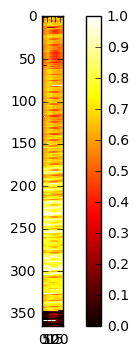

In [10]:
loadCurves1=(loadCurves1-loadCurves1.min())/(loadCurves1.max()-loadCurves1.min())

plt.imshow(loadCurves1,cmap='hot',interpolation='nearest')
plt.colorbar()

# Task \#8 (20%)

Let's see if we can find some patterns in these load curves. Using your favorite implementation and flavor of the k-means algorithm, play around with clustering the daily loadCurves to see if we can find 2 or 3 clusters that would best differentiate between weekdays and weekends. In other words, perform k-means (or k-medioids, or whatever) on the dataset with $k \in \{2, 3\}$ and the dataset being 365 samples of 24-dimensional vectors.

Note: you will only check the weekend vs. weekday labels **after** clustering (i.e., do not use this attribute for clustering, but rather only the 24 average hourly consumption values).

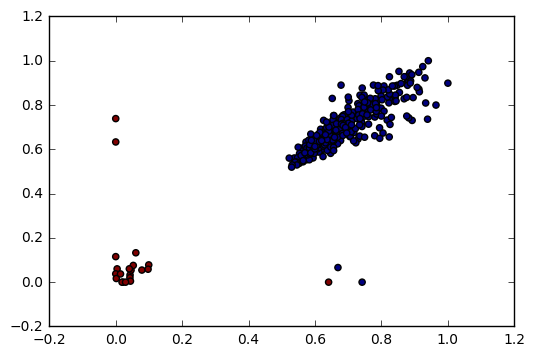

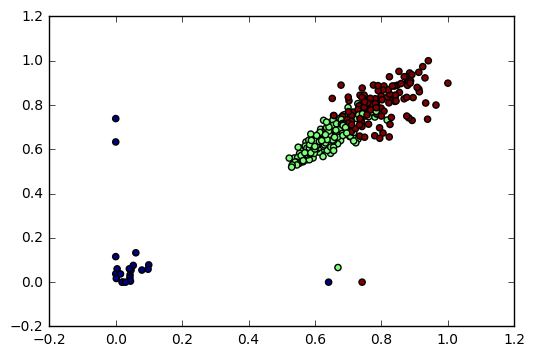

In [11]:
from sklearn.cluster import KMeans

loadCurves2=loadCurves1.fillna(0)
loadCurves2_mat = loadCurves2.as_matrix()
A= loadCurves2_mat
km=KMeans(n_clusters=2,init='k-means++').fit(A)
y_pred=km.fit_predict(A)

plt.scatter(A[:,0],A[:,23],c=y_pred)
plt.show()
km=KMeans(n_clusters=3,init='k-means++').fit(A)
y_pred=km.fit_predict(A)

plt.scatter(A[:,0],A[:,23],c=y_pred)
plt.show()

# from pylab import plot,show
# from numpy import vstack,array
# from numpy.random import rand
# from scipy.cluster.vq import kmeans,vq

# # data generation
# # loadCurves1 = vstack((rand(150,2) + array([.5,.5]),rand(150,2)))

# loadCurves1=(loadCurves1-loadCurves1.min())/(loadCurves1.max()-loadCurves1.min())
# loadCurves2=loadCurves1.fillna(0)
# LC=loadCurves2.as_matrix()

# print(LC)

# # computing K-Means with K = 2 (2 clusters)
# centroids,_ = kmeans(LC,2)
# # assign each sample to a cluster
# idx,_ = vq(LC,centroids)

# # some plotting using numpy's logical indexing
# plot(LC[idx==0,0],LC[idx==0,1],'ob',
#      LC[idx==1,0],LC[idx==1,1],'or')
# plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
# show()

# # now with K = 3 (3 clusters)
# centroids,_ = kmeans(LC,3)
# idx,_ = vq(LC,centroids)

# plot(LC[idx==0,0],LC[idx==0,1],'ob',
#      LC[idx==1,0],LC[idx==1,1],'or',
#      LC[idx==2,0],LC[idx==2,1],'og') # third cluster points
# plot(centroids[:,0],centroids[:,1],'sm',markersize=8)
# show()

# Task \#9 (10%)

In separate plots (one for each cluster), plot the cluster centroids (in a dark, thick line) and the load curves that belong to the cluster (using thin grayish lines), just like the paper did. 

What did you learn from the experiment above?

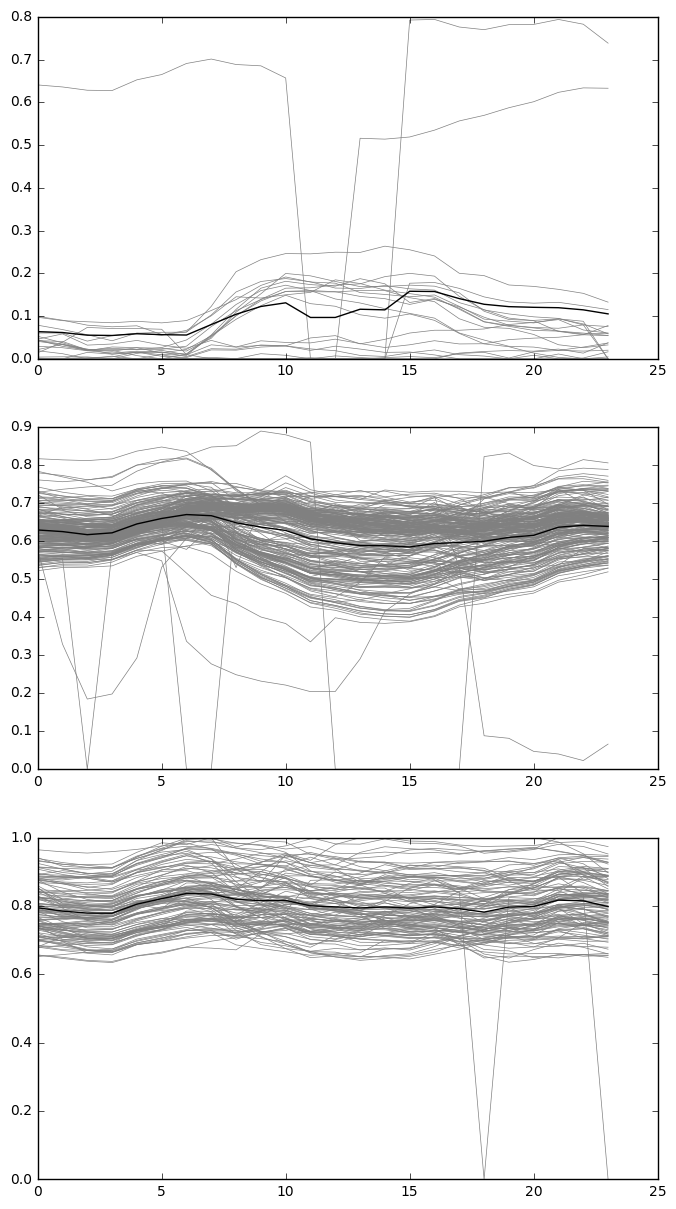

In [12]:
cc = km.cluster_centers_
c1=np.where(y_pred==0)
c2=np.where(y_pred==1)
c3=np.where(y_pred==2)

fig,ax=plt.subplots(3,1,figsize=(8,15))

for x in np.nditer(c1):
    ax[0].plot(A[x],"grey",linewidth=0.5)
ax[0].plot(cc[0],"black")

for x in np.nditer(c2):
    ax[1].plot(A[x],"grey",linewidth=0.5)
ax[1].plot(cc[1],"black")

for x in np.nditer(c3):
    ax[2].plot(A[x],"grey",linewidth=0.5)
ax[2].plot(cc[2],"black")

We learnt that during the weekdays the electricity consumption was more compared to the electricity consumption during the weekends